In [1]:
import numpy as np
import tensorflow as tf
import os
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ✅ Load preprocessed dataset
DATASET_DIR = "processed_lung_ct"
X_train = np.load(os.path.join(DATASET_DIR, "X_train.npy"))
X_val = np.load(os.path.join(DATASET_DIR, "X_val.npy"))
X_test = np.load(os.path.join(DATASET_DIR, "X_test.npy"))
y_train = np.load(os.path.join(DATASET_DIR, "y_train.npy"))
y_val = np.load(os.path.join(DATASET_DIR, "y_val.npy"))
y_test = np.load(os.path.join(DATASET_DIR, "y_test.npy"))

# ✅ Define CNN Model (4 Conv Layers)
model = Sequential([
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
    
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
    
        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
    
        Conv2D(512, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
    
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),  # Prevent Overfitting
        Dense(1, activation='sigmoid')  # Binary classification (Fake or Real)
])

# ✅ Compile Model with Learning Rate = 0.0001
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint("cnn_lung_ct_1_best.h5", save_best_only=True, monitor='val_loss')

# ✅ Train the model & save history
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

# ✅ Save the final trained model
model.save("cnn_lung_ct_1.h5")

# ✅ Save training history to JSON
with open("training_history.json", "w") as f:
    json.dump(history.history, f)

# ✅ Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print("✅ Model training complete. Model saved as `cnn_lung_ct_1.h5` and best model as `cnn_lung_ct_1_best.h5`")

C:\Users\Dines\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7306 - loss: 2.0522  

90/90 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.7312 - loss: 2.0425 - val_accuracy: 0.5000 - val_loss: 5.0528 - learning_rate: 1.0000e-04
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 333s 4s/step - accuracy: 0.9023 - loss: 0.2350 - val_accuracy: 0.5000 - val_loss: 6.5820 - learning_rate: 1.0000e-04
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9488 - loss: 0.1427  

90/90 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.9486 - loss: 0.1430 - val_accuracy: 0.5000 - val_loss: 4.6237 - learning_rate: 1.0000e-04
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 328s 4s/step - accuracy: 0.9450 - loss: 0.1399 - val_accuracy: 0.5000 - val_loss: 5.1460 - learning_rate: 1.0000e-04
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9472 - loss: 0.1235  

90/90 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.9472 - loss: 0.1235 - val_accuracy: 0.6444 - val_loss: 1.4825 - learning_rate: 1.0000e-04
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9884 - loss: 0.0371  

90/90 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9883 - loss: 0.0372 - val_accuracy: 0.8000 - val_loss: 0.5676 - learning_rate: 1.0000e-04
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9864 - loss: 0.0388  

90/90 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.9863 - loss: 0.0389 - val_accuracy: 0.9389 - val_loss: 0.1268 - learning_rate: 1.0000e-04
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9783 - loss: 0.0710  

90/90 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9784 - loss: 0.0707 - val_accuracy: 0.9778 - val_loss: 0.0489 - learning_rate: 1.0000e-04
Epoch 9/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9874 - loss: 0.0292 - val_accuracy: 0.9667 - val_loss: 0.0694 - learning_rate: 1.0000e-04
Epoch 10/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9879 - loss: 0.0330  

90/90 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.9879 - loss: 0.0331 - val_accuracy: 0.9944 - val_loss: 0.0336 - learning_rate: 1.0000e-04
Epoch 11/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9889 - loss: 0.0306  

90/90 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9889 - loss: 0.0306 - val_accuracy: 0.9889 - val_loss: 0.0300 - learning_rate: 1.0000e-04
Epoch 12/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.9833 - loss: 0.0300 - val_accuracy: 0.9944 - val_loss: 0.0486 - learning_rate: 1.0000e-04
Epoch 13/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9936 - loss: 0.0242  

90/90 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.9935 - loss: 0.0245 - val_accuracy: 0.9889 - val_loss: 0.0182 - learning_rate: 1.0000e-04
Epoch 14/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9822 - loss: 0.0486 - val_accuracy: 0.9722 - val_loss: 0.1282 - learning_rate: 1.0000e-04
Epoch 15/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.9845 - loss: 0.0467 - val_accuracy: 0.9667 - val_loss: 0.1009 - learning_rate: 1.0000e-04
Epoch 16/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9894 - loss: 0.0344  
Epoch 16: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
90/90 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.9894 - loss: 0.0346 - val_accuracy: 0.9611 - val_loss: 0.1925 - learning_rate: 1.0000e-04
Epoch 17/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.9923 - loss: 0.0275 - val_accuracy: 0.9778 - val_loss: 0.1447 - learning_rate: 5.0000e-05
Epoch 18/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9984 - loss: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 918ms/step - accuracy: 0.9855 - loss: 0.0297
✅ Test Accuracy: 0.9833
✅ Model training complete. Model saved as `cnn_lung_ct_1.h5` and best model as `cnn_lung_ct_1_best.h5`


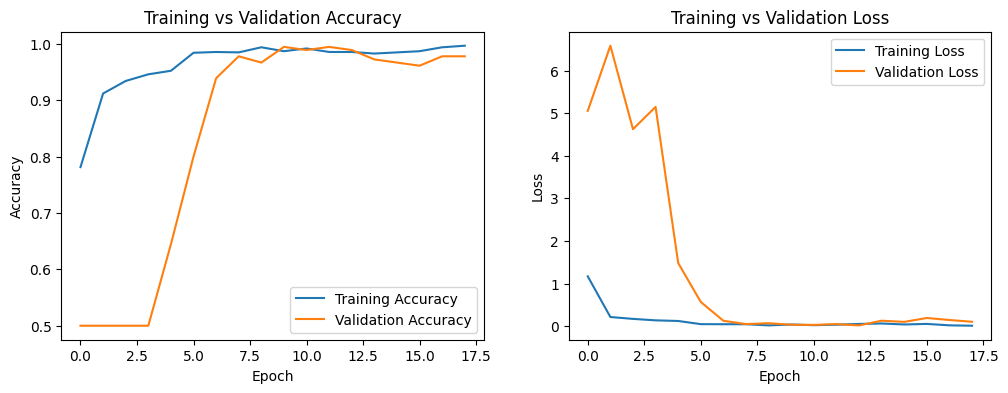

In [2]:
# ✅ Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

# ✅ Call the function to plot
plot_training_history(history)


In [14]:
import numpy as np
import os

DATASET_DIR = "processed_lung_ct"
X_test = np.load(os.path.join(DATASET_DIR, "X_test.npy"))
y_test = np.load(os.path.join(DATASET_DIR, "y_test.npy"))


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 819ms/step


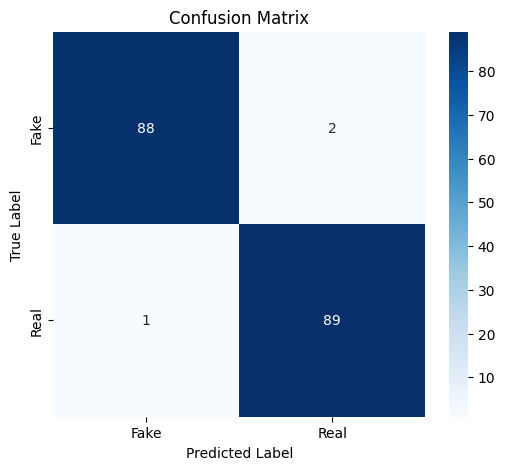

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98        90
        Real       0.98      0.99      0.98        90

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ✅ Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


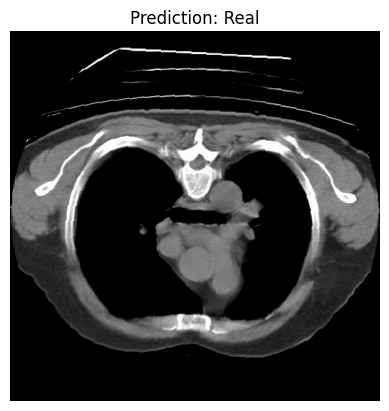

In [5]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("cnn_lung_ct_1_best.h5")  # Make sure this file exists

# Load and preprocess the new image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to new CT scan image
img_path = r"C:\Users\Dines\OneDrive\Desktop\a\r1.png"  # <-- replace this with actual path

# Predict
new_img = preprocess_image(img_path)
prediction = model.predict(new_img)

# Show result
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title("Prediction: " + ("Fake" if prediction[0][0] > 0.5 else "Real"))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


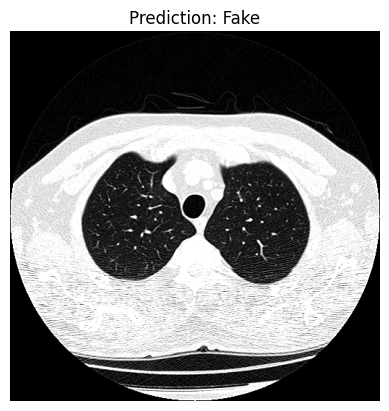

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


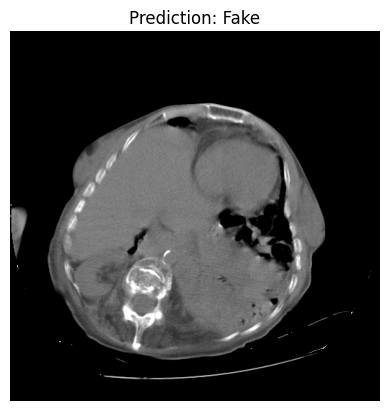

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


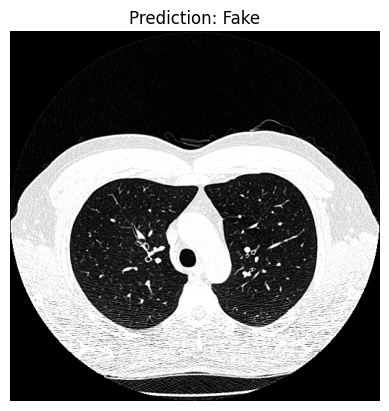

In [7]:
# List of image paths
img_paths = [
    r"C:\Users\Dines\OneDrive\Desktop\a\r1.png",
    r"C:\Users\Dines\OneDrive\Desktop\a\r2.png",
    r"C:\Users\Dines\OneDrive\Desktop\a\r3.png"
]

# Loop through each image, predict and display result
for img_path in img_paths:
    new_img = preprocess_image(img_path)
    prediction = model.predict(new_img)

    plt.imshow(image.load_img(img_path), cmap='gray')
    plt.title("Prediction: " + ("Fake" if prediction[0][0] > 0.5 else "Real"))
    plt.axis('off')
    plt.show()


In [1]:
from tensorflow.keras.models import load_model

# Load the best saved model
model = load_model("cnn_lung_ct_1_best.h5")

# Print model summary to confirm it's loaded
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,245,443 (103.93 MB)

 Trainable params: 27,243,521 (103.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 2 (12.00 B)